# ENSEMBLE MODELS

Ensemble learning is a machine learning technique that enhances accuracy and resilience in forecasting by merging predictions from multiple models. It aims to mitigate errors or biases that may exist in individual models by leveraging the collective intelligence of the ensemble.

The underlying concept behind ensemble learning is to combine the outputs of diverse models to create a more precise prediction. By considering multiple perspectives and utilizing the strengths of different models, ensemble learning improves the overall performance of the learning system. This approach not only enhances accuracy but also provides resilience against uncertainties in the data. By effectively merging predictions from multiple models, ensemble learning has proven to be a powerful tool in various domains, offering more robust and reliable forecasts

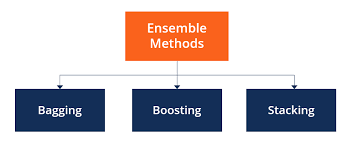

## Data Description

##### Predict the churn rate based on behaviour  of customers for a  telecom dataset using Ensemble models

The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## 1. Data Preprocessing

In [3]:
df=pd.read_csv("C:/Users/Prath/OneDrive/Documents/Datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
df.shape

(667, 20)

In [6]:
# Summary statistics
df.describe().style.background_gradient(cmap="Blues",axis=None)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [7]:
# Identify categorical columns in the dataset
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [10]:
encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid multicollinearity
encoded_cols = encoder.fit_transform(df[categorical_cols])

In [11]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names(categorical_cols))

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df.head().style.background_gradient(cmap="Blues",axis=None)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.500000,97,31.370000,351.600000,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,65,415,0,129.100000,137,21.950000,228.500000,83,19.420000,208.800000,111,9.400000,12.700000,6,3.430000,4,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,161,415,0,332.900000,67,56.590000,317.800000,97,27.010000,160.600000,128,7.230000,5.400000,9,1.460000,4,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,111,415,0,110.400000,103,18.770000,137.300000,102,11.670000,189.600000,105,8.530000,7.700000,6,2.080000,2,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,49,510,0,119.300000,117,20.280000,215.100000,109,18.280000,178.700000,90,8.040000,11.100000,1,3.000000,1,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 2. Split into train, validation, and test set

In [15]:
features = df.drop('Churn', axis=1)
labels = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

In [16]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


### Write out all data

In [17]:
X_train.to_csv('C:/Users/Prath/OneDrive/Desktop/train_features.csv', index=False)
X_val.to_csv('C:/Users/Prath/OneDrive/Desktop/val_features.csv', index=False)
X_test.to_csv('C:/Users/Prath/OneDrive/Desktop/test_features.csv', index=False)

y_train.to_csv('C:/Users/Prath/OneDrive/Desktop/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Prath/OneDrive/Desktop/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Prath/OneDrive/Desktop/test_labels.csv', index=False)

# 3. Boosting

Boosting is an ensemble modelingBoosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added.  technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added. 

<img src= "https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png" width=450 height=250/>

In [18]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [19]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [21]:
tr_features=pd.read_csv('C:/Users/Prath/OneDrive/Desktop/train_features.csv')
tr_labels=pd.read_csv('C:/Users/Prath/OneDrive/Desktop/train_labels.csv')

In [22]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [23]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}
cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.847 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.847 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.85 (+/-0.016) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.855 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.847 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.847 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.865 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.86 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.847 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.847 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.878 (+/-0.019) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.88 (+/-0.02) for {'learning_rate': 0.01

In [24]:
cv.best_estimator_

GradientBoostingClassifier(n_estimators=250)

#### Write out picked model

In [25]:
joblib.dump(cv.best_estimator_, 'C:/Users/Prath/OneDrive/Desktop/GB_model.pkl')

['C:/Users/Prath/OneDrive/Desktop/GB_model.pkl']

# 4. Bagging

The Bagging is an assembling approach that tries to resolve overfitting for class or the regression problems. Bagging pursuits to improve the accuracy and overall performance of gadget mastering algorithms. It does this by taking random subsets of an original dataset, with substitute, and fits either a classifier (for classification) or regressor (for regression) to each subset. Bagging is also known as Bootstrap aggregating. It is an ensemble learning approach that enhances the overall performance and accuracy of the gadget for learning algorithms. It is miles used to address bias-variance alternate-off increases and decreases the variance of a prediction version. The Bagging avoids overfitting of data and is used for each regression and classification of the class, in particular for the decision tree algorithms.

<img src= "https://www.simplilearn.com/ice9/free_resources_article_thumb/Bagging.PNG" width=450 height=250/>

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [29]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [4, 8, 16, 32, None],
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}

0.852 (+/-0.019) for {'max_depth': 4, 'n_estimators': 5}
0.86 (+/-0.019) for {'max_depth': 4, 'n_estimators': 50}
0.855 (+/-0.012) for {'max_depth': 4, 'n_estimators': 250}
0.858 (+/-0.012) for {'max_depth': 4, 'n_estimators': 500}
0.868 (+/-0.073) for {'max_depth': 8, 'n_estimators': 5}
0.872 (+/-0.043) for {'max_depth': 8, 'n_estimators': 50}
0.87 (+/-0.034) for {'max_depth': 8, 'n_estimators': 250}
0.87 (+/-0.034) for {'max_depth': 8, 'n_estimators': 500}
0.868 (+/-0.041) for {'max_depth': 16, 'n_estimators': 5}
0.878 (+/-0.024) for {'max_depth': 16, 'n_estimators': 50}
0.88 (+/-0.037) for {'max_depth': 16, 'n_estimators': 250}
0.88 (+/-0.034) for {'max_depth': 16, 'n_estimators': 500}
0.857 (+/-0.025) for {'max_depth': 32, 'n_estimators': 5}
0.878 (+/-0.019) for {'max_depth': 32, 'n_estimators': 50}
0.878 (+/-0.048) for {'max_depth': 32, 'n_estimators': 250}
0.875 (+/-0.035) for {'max_depth': 32, 'n_estimators': 500}
0.85 (+/-0.0

In [30]:
cv.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=250)

#### Picked Model

In [31]:
joblib.dump(cv.best_estimator_, 'C:/Users/Prath/OneDrive/Desktop/RF_model.pkl')

['C:/Users/Prath/OneDrive/Desktop/RF_model.pkl']

# 5. Stacking

Stacking is one of the popular ensemble modeling techniques in machine learning. Various weak learners are ensembled in a parallel manner in such a way that by combining them with Meta learners, we can predict better predictions for the future.

This ensemble technique works by applying input of combined multiple weak learners' predictions and Meta learners so that a better output prediction model can be achieved.

In stacking, an algorithm takes the outputs of sub-models as input and attempts to learn how to best combine the input predictions to make a better output prediction.

Stacking is also known as a stacked generalization and is an extended form of the Model Averaging Ensemble technique in which all sub-models equally participate as per their performance weights and build a new model with better predictions. This new model is stacked up on top of the others; this is the reason why it is named stacking.

<img src= "https://editor.analyticsvidhya.com/uploads/39725Stacking.png" width=450 height=450/>

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
estimators=[('gb',GradientBoostingClassifier()),('rf',RandomForestClassifier())]
StackingClassifier(estimators=estimators).get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None

In [34]:
estimators=[('gb',GradientBoostingClassifier()),('rf',RandomForestClassifier())]
sc=StackingClassifier(estimators=estimators)
sc.get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None

In [35]:
parameters = {
    'gb__n_estimators': [50, 100],
    'rf__n_estimators': [50, 100],
    'final_estimator':[LogisticRegression(C=0.1),
                      LogisticRegression(C=1),
                      LogisticRegression(C=10)],
    'passthrough':[True,False]
}
cv = GridSearchCV(sc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'final_estimator': LogisticRegression(C=10), 'gb__n_estimators': 100, 'passthrough': False, 'rf__n_estimators': 50}

0.85 (+/-0.05) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 50}
0.838 (+/-0.042) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 100}
0.847 (+/-0.01) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 50}
0.847 (+/-0.01) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 100}
0.847 (+/-0.043) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 50}
0.85 (+/-0.032) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 100}
0.847 (+/-0.01) for {'final_estimator': Logis

In [36]:
joblib.dump(cv.best_estimator_, 'C:/Users/Prath/OneDrive/Desktop/Stacked_model.pkl')

['C:/Users/Prath/OneDrive/Desktop/Stacked_model.pkl']

 # 6. Comparing the models

In [37]:
val_features=pd.read_csv('C:/Users/Prath/OneDrive/Desktop/val_features.csv')
val_labels=pd.read_csv('C:/Users/Prath/OneDrive/Desktop/val_labels.csv')

te_features=pd.read_csv('C:/Users/Prath/OneDrive/Desktop/test_features.csv')
te_labels=pd.read_csv('C:/Users/Prath/OneDrive/Desktop/test_labels.csv')

In [38]:
gb_mdl = joblib.load('C:/Users/Prath/OneDrive/Desktop/GB_model.pkl')
rf_mdl = joblib.load('C:/Users/Prath/OneDrive/Desktop/RF_model.pkl')
stacked_mdl = joblib.load('C:/Users/Prath/OneDrive/Desktop/Stacked_model.pkl')

In [39]:
def evaluate_model(model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(str(model).split('(')[0],
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [40]:
for mdl in [gb_mdl,rf_mdl,stacked_mdl]:
    evaluate_model(mdl,val_features, val_labels)

GradientBoostingClassifier -- Accuracy: 0.94 / Precision: 0.647 / Recall: 0.846 / Latency: 3.3ms
RandomForestClassifier -- Accuracy: 0.925 / Precision: 0.8 / Recall: 0.308 / Latency: 29.4ms
StackingClassifier -- Accuracy: 0.932 / Precision: 0.667 / Recall: 0.615 / Latency: 9.0ms


In [41]:
evaluate_model(gb_mdl, te_features, te_labels)

GradientBoostingClassifier -- Accuracy: 0.94 / Precision: 0.882 / Recall: 0.714 / Latency: 3.0ms


# 7. Conclusion

In this notebook, we have learnt about the ensemble models namely Boosting, Bagging and Stacking. We have built each of these models using the Titanic dataset and compared the accuracy, precision and Recall of the models. From the above, we can conclude that Gradient Boosting Classifier Model with 94% accuracy with validation set and 94% accuracy with the test set is the best model for our dataset.